In [60]:
import pandas as pd
df = pd.read_excel('/Users/vicky_ceshen/Desktop/MMA/literate-guide/MMA/Machine Learning & Data Mining/group_assignment_1/ebayAuctionsCleaned.xlsx', sheet_name='Sheet1')

First approach: Label endcoding 

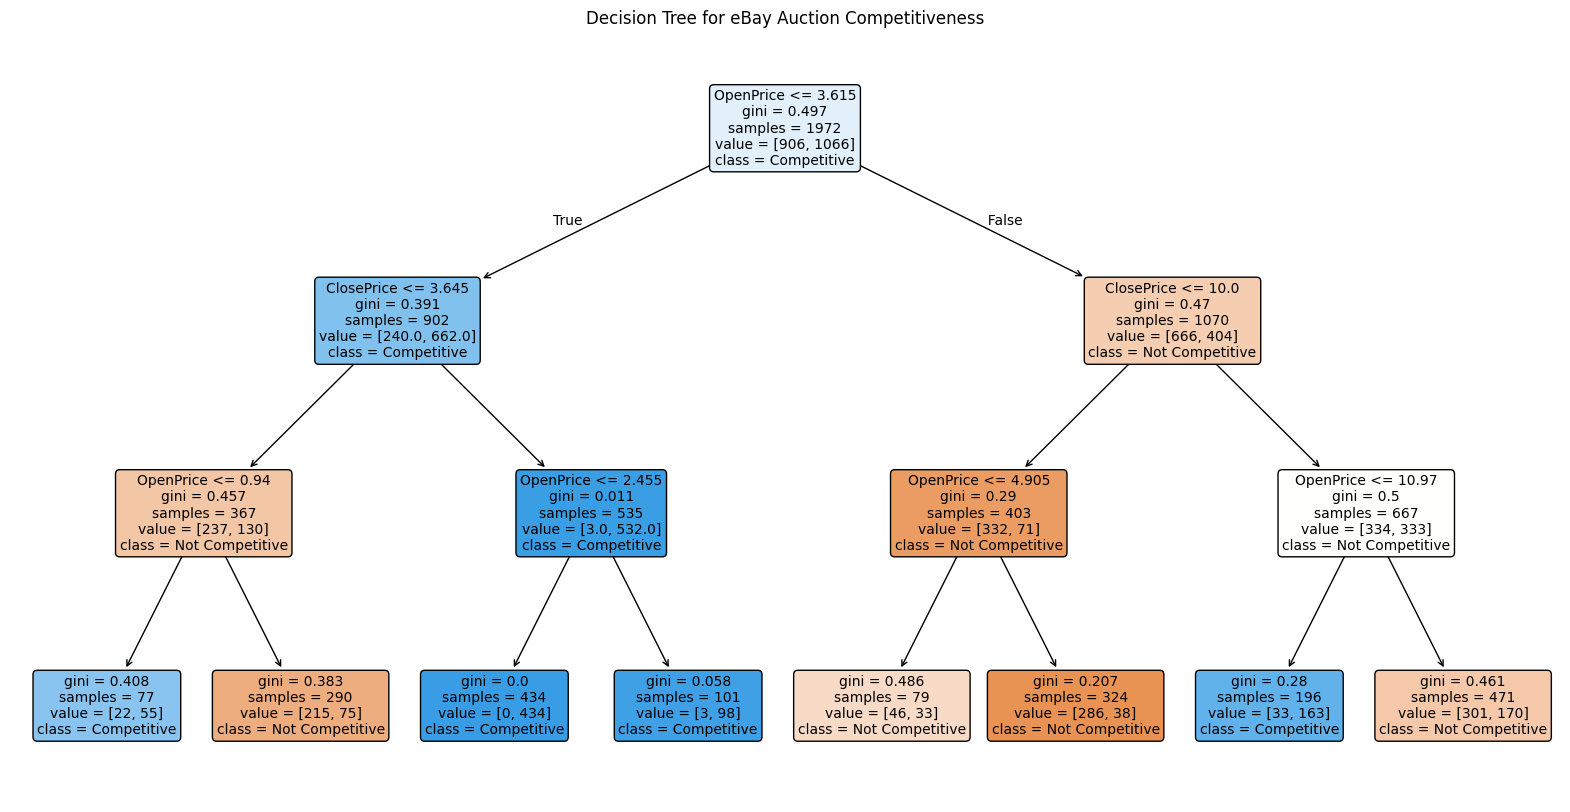

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Prepare your data
# Assuming df has your features and 'Competitive?' target
# Encode categorical variables if needed
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
df['Currency_encoded'] = le.fit_transform(df['Currency'])
df['endDay_encoded'] = le.fit_transform(df['endDay'])


# Select features (include all you want to use)
features = ['Category_encoded', 'ClosePrice', 'sellerRating', 'Duration', 
            'endDay_encoded', 'OpenPrice', 'Currency_encoded']

X = df[features]
y = df['Competitive?']

# Create and fit decision tree
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=3, random_state=42)  # Limit depth for readability
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=features,
          class_names=['Not Competitive', 'Competitive'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for eBay Auction Competitiveness')
plt.show()

In [29]:
from sklearn.tree import export_graphviz
import graphviz


# Use OneHotEncoding for categorical variables to keep names
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define categorical and numerical features
categorical_features = ['Category', 'Currency', 'endDay']
numerical_features = ['ClosePrice', 'sellerRating', 'Duration', 'OpenPrice']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)




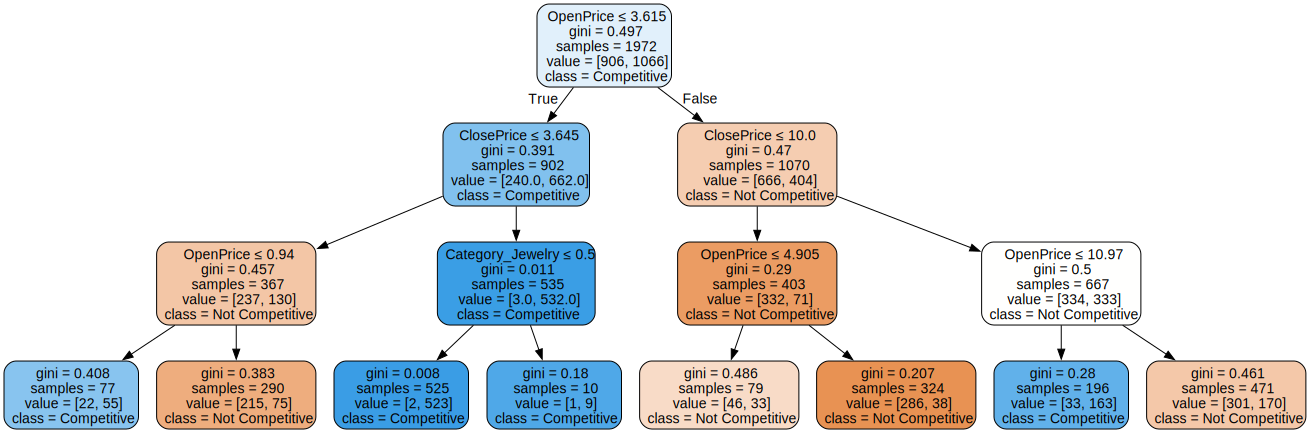

In [18]:
# Fit and transform
X_processed = preprocessor.fit_transform(df)

# Get feature names after one-hot encoding
feature_names = (list(preprocessor.named_transformers_['cat'].get_feature_names_out()) + 
                 numerical_features)

# Fit tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_processed, y)

# Export to graphviz
dot_data = export_graphviz(clf,
                          feature_names=feature_names,
                          class_names=['Not Competitive', 'Competitive'],
                          filled=True,
                          rounded=True,
                          special_characters=True,
                          max_depth=3)  # Limit depth

# Create graph
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Saves as PDF
graph  # Displays in notebook


FEATURE IMPORTANCE:
        feature  importance
1      Currency    0.509208
5    ClosePrice    0.490792
0      Category    0.000000
2        endDay    0.000000
3  sellerRating    0.000000
4      Duration    0.000000
6     OpenPrice    0.000000


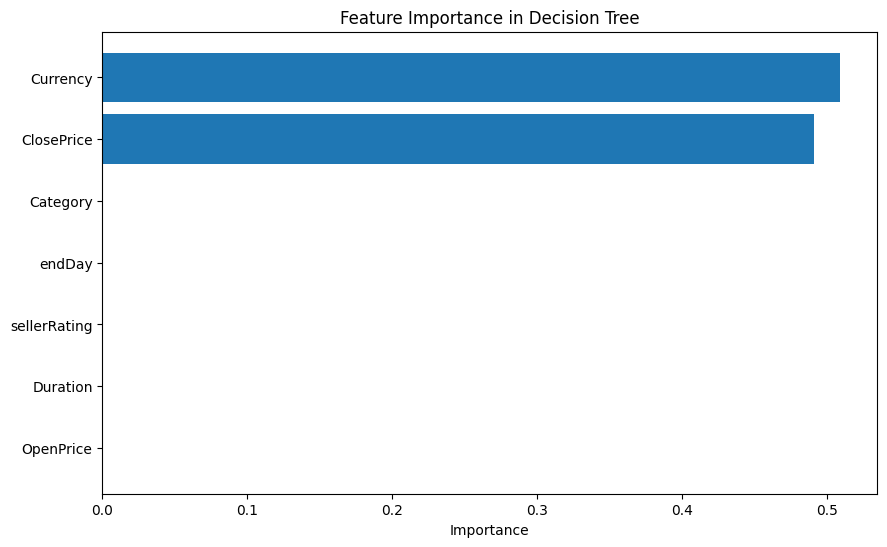

In [30]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

Second approach: One-Hot Encoding

In [61]:
### Second approach: One-Hot Encoding
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder



In [62]:
df_encoded = pd.get_dummies(df, 
    columns=['Category', 'Currency', 'endDay'],
    drop_first=True,  # Avoids dummy variable trap
    prefix=['cat', 'curr', 'day']
)




KeyError: "['Category', 'Currency'] not in index"

In [53]:
print("Encoded DataFrame shape:", df_encoded.shape)
print("Columns after encoding:", df_encoded.columns.tolist())

Encoded DataFrame shape: (1972, 33)
Columns after encoding: ['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice', 'Competitive?', 'Category_encoded', 'Currency_encoded', 'endDay_encoded', 'cat_Automotive', 'cat_Books', 'cat_Business/Industrial', 'cat_Clothing/Accessories', 'cat_Coins/Stamps', 'cat_Collectibles', 'cat_Computer', 'cat_Electronics', 'cat_EverythingElse', 'cat_Health/Beauty', 'cat_Home/Garden', 'cat_Jewelry', 'cat_Music/Movie/Game', 'cat_Photography', 'cat_Pottery/Glass', 'cat_SportingGoods', 'cat_Toys/Hobbies', 'curr_GBP', 'curr_US', 'day_Mon', 'day_Sat', 'day_Sun', 'day_Thu', 'day_Tue', 'day_Wed']


In [42]:
# Encode categorical variables
categorical_cols = ['Category', 'Currency', 'endDay']
for col in categorical_cols:
    df_encoded[col + '_encoded'] = le.fit_transform(df[col])


In [63]:
df

,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?,ClosePriceUSD,OpenPriceUSD,Category_Antique/Art/Craft,Category_Automotive,...,Category_Home/Garden,Category_Jewelry,Category_Music/Movie/Game,Category_Photography,Category_Pottery/Glass,Category_SportingGoods,Category_Toys/Hobbies,Currency_EUR,Currency_GBP,Currency_US
0,3249,5,0,0.01,0.01,0,0.01,0.01,False,False,...,False,False,True,False,False,False,False,False,False,True
1,3249,5,0,0.01,0.01,0,0.01,0.01,False,False,...,False,False,True,False,False,False,False,False,False,True
2,3249,5,0,0.01,0.01,0,0.01,0.01,False,False,...,False,False,True,False,False,False,False,False,False,True
3,3249,5,0,0.01,0.01,0,0.01,0.01,False,False,...,False,False,True,False,False,False,False,False,False,True
4,3249,5,0,0.01,0.01,0,0.01,0.01,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,2992,5,6,359.95,359.95,0,359.95,359.95,False,True,...,False,False,False,False,False,False,False,False,False,True
1968,21,5,5,610.00,300.00,1,610.00,300.00,False,True,...,False,False,False,False,False,False,False,False,False,True
1969,1400,5,0,549.00,549.00,0,549.00,549.00,False,True,...,False,False,False,False,False,False,False,False,False,True
1970,57,7,4,820.00,650.00,1,820.00,650.00,False,True,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
# Define features (all predictors)
features = ['Category_encoded', 'Currency_encoded', 'endDay_encoded', 'sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']
X = df[features]
y = df['Competitive?']



In [ ]:
# If we do a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# If we do NOT do a train-test split

In [44]:
# Feature names for display
feature_names = ['Category', 'Currency', 'endDay', 'sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']



In [45]:
# Fit tree with min_samples_leaf=50 to avoid overfitting
clf = DecisionTreeClassifier(
    min_samples_leaf=50,    # Minimum 50 records per terminal node
    random_state=42,
    max_depth=10            # Optional: limit depth for interpretability
)


In [46]:
# clf.fit(X_train, y_train)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [47]:
print(f"Tree fitted with {clf.tree_.node_count} nodes")
print(f"Minimum samples per leaf: {clf.min_samples_leaf}")

Tree fitted with 49 nodes
Minimum samples per leaf: 50


In [48]:
# 4. Evaluate on test data
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"\nModel Performance:")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")




Model Performance:
Training Accuracy: 0.854
Test Accuracy: 0.828


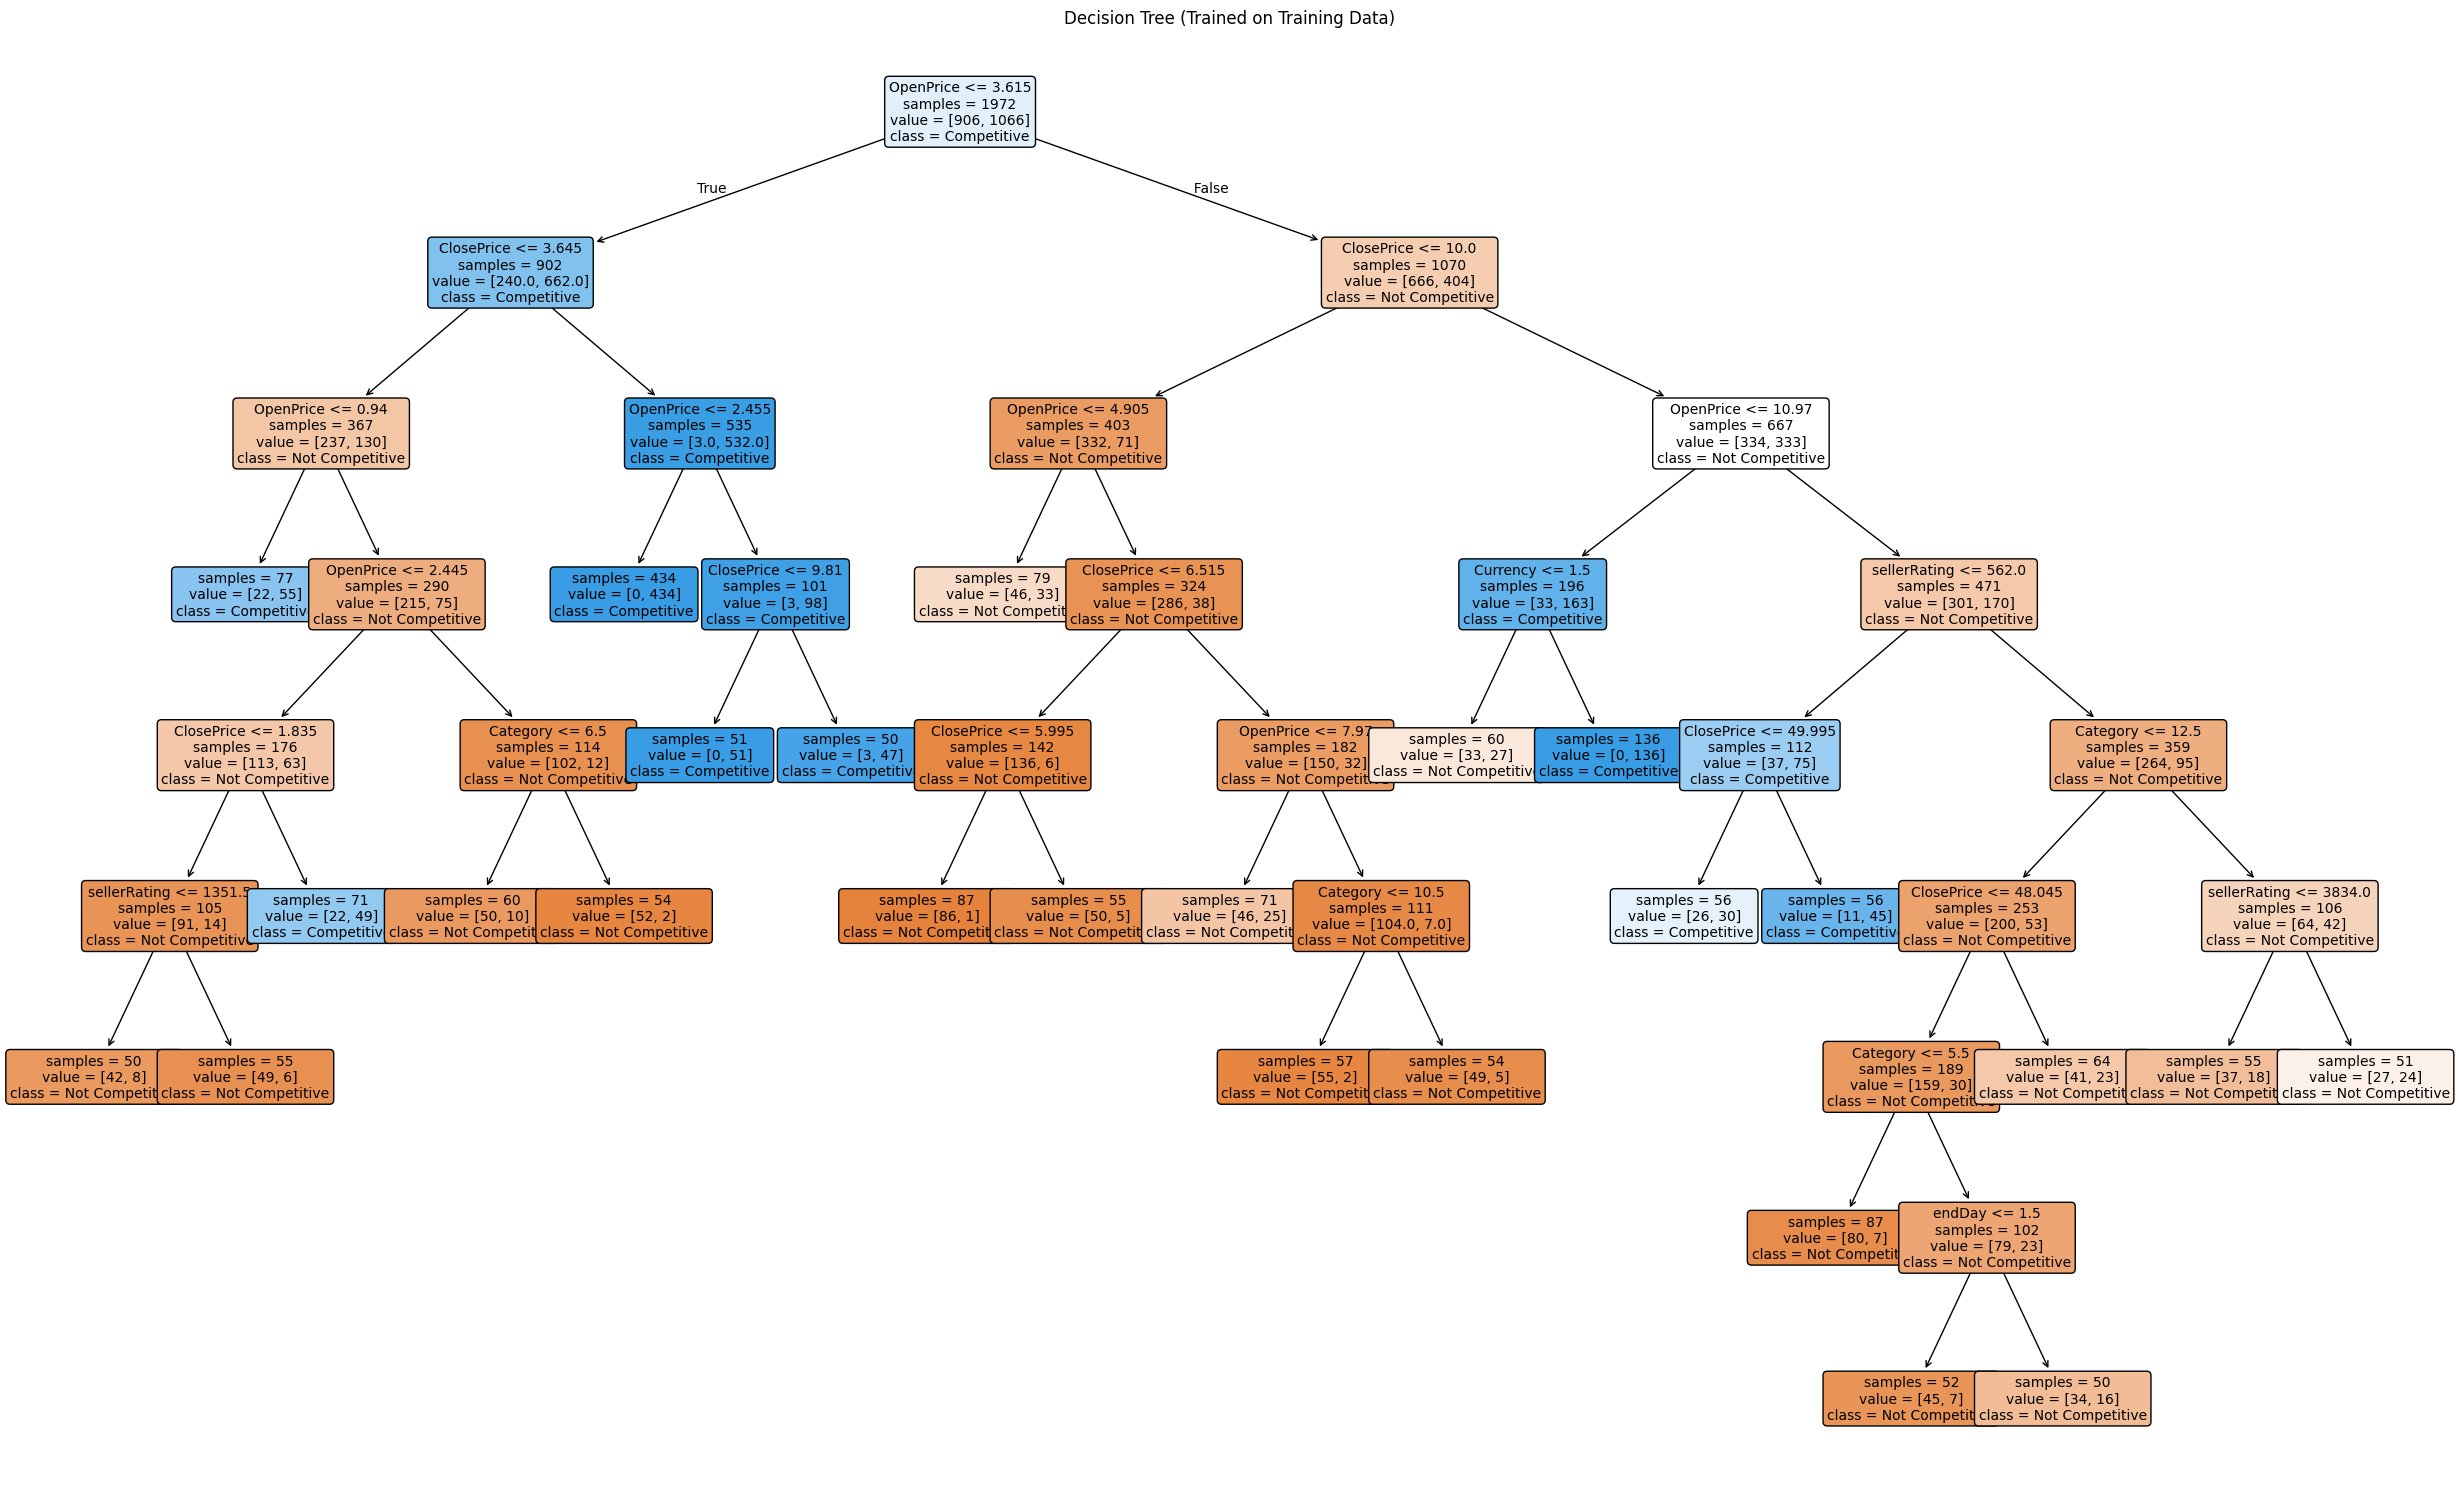

In [49]:
# 5. Plot the tree (trained on training data)
plt.figure(figsize=(25, 15))
plot_tree(clf, 
          feature_names=feature_names,
          class_names=['Not Competitive', 'Competitive'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False)
plt.title('Decision Tree (Trained on Training Data)')
plt.tight_layout()
plt.show()



FEATURE IMPORTANCE:
        feature  importance
5    ClosePrice    0.469703
6     OpenPrice    0.417450
3  sellerRating    0.051145
1      Currency    0.044072
0      Category    0.014564
2        endDay    0.003066
4      Duration    0.000000


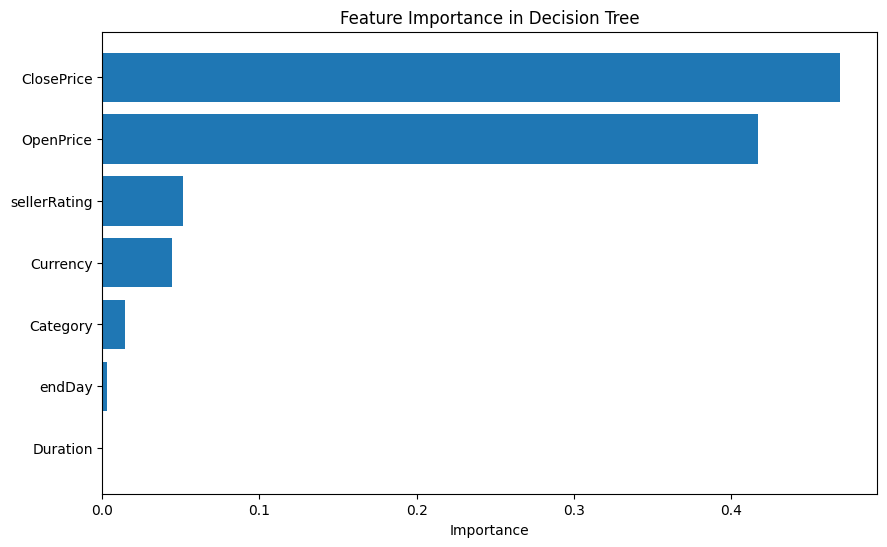

In [50]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Final analysis, insights
print("Look for unexpected patterns like:")
print("- Certain categories being unexpectedly competitive")
print("- Specific price ranges that attract competition") 
print("- Day/time patterns that contradict expectations")
print("- Seller rating thresholds that matter")

Look for unexpected patterns like:
- Certain categories being unexpectedly competitive
- Specific price ranges that attract competition
- Day/time patterns that contradict expectations
- Seller rating thresholds that matter


In [39]:
top_features = feature_importance.head(3)['feature'].tolist()
print(f"\nTop 3 predictors to keep: {top_features}")


Top 3 predictors to keep: ['OpenPrice', 'ClosePrice', 'sellerRating']


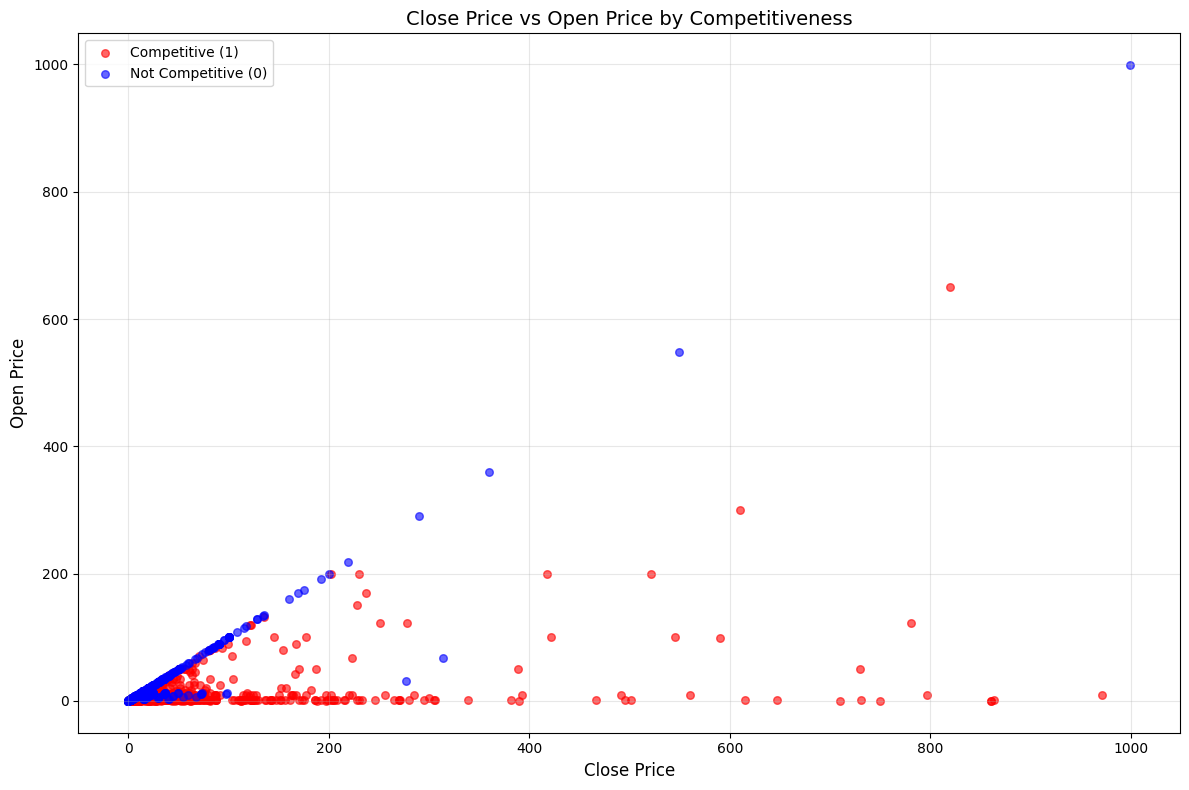

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot Competitive = 1 (Red)
plt.scatter(df[df['Competitive?'] == 1]['ClosePrice'], 
            df[df['Competitive?'] == 1]['OpenPrice'], 
            c='red', alpha=0.6, label='Competitive (1)', s=30)

# Plot Competitive = 0 (Blue)
plt.scatter(df[df['Competitive?'] == 0]['ClosePrice'], 
            df[df['Competitive?'] == 0]['OpenPrice'], 
            c='blue', alpha=0.6, label='Not Competitive (0)', s=30)

plt.xlabel('Close Price', fontsize=12)
plt.ylabel('Open Price', fontsize=12)
plt.title('Close Price vs Open Price by Competitiveness', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()